## Black Friday Dataset EDA and Feature Engineering
### Cleaning and preparing the data for model training

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Problem statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [107]:
# import the train dataset
df_train = pd.read_csv('black_friday/train.csv')

In [108]:
# import the test dataset
df_test = pd.read_csv('black_friday/test.csv')

In [109]:
# merge both train and test data
df = df_train.append(df_test)
df.head()

/home/pierre/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID
0,0-17,A,F,0,10,3,NaN,NaN,P00069042,8370.0,2,1000001
1,0-17,A,F,0,10,1,6.0,14.0,P00248942,15200.0,2,1000001
2,0-17,A,F,0,10,12,NaN,NaN,P00087842,1422.0,2,1000001
3,0-17,A,F,0,10,12,14.0,NaN,P00085442,1057.0,2,1000001
4,55+,C,M,0,16,8,NaN,NaN,P00285442,7969.0,4+,1000002


In [110]:
df.shape

(783667, 12)

In [111]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
Age                           783667 non-null object
City_Category                 783667 non-null object
Gender                        783667 non-null object
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            537685 non-null float64
Product_Category_3            237858 non-null float64
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null object
User_ID                       783667 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [113]:
df.describe()

,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_ID
count,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000,7.836670e+05
mean,0.409777,8.079300,5.366196,9.844506,12.668605,9263.968713,1.003029e+06
std,0.491793,6.522206,3.878160,5.089093,4.125510,5023.065394,1.727267e+03
min,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000,1.000001e+06
25%,0.000000,2.000000,1.000000,5.000000,9.000000,5823.000000,1.001519e+06
50%,0.000000,7.000000,5.000000,9.000000,14.000000,8047.000000,1.003075e+06
75%,1.000000,14.000000,8.000000,15.000000,16.000000,12054.000000,1.004478e+06
max,1.000000,20.000000,20.000000,18.000000,18.000000,23961.000000,1.006040e+06


In [114]:
# Drop User_ID (useless)
df.drop(['User_ID'],axis=1, inplace=True)

In [115]:
df.columns

Index(['Age', 'City_Category', 'Gender', 'Marital_Status', 'Occupation',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Product_ID', 'Purchase', 'Stay_In_Current_City_Years'],
      dtype='object')

In [116]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [117]:
# Handling categorical feature Gender
df['Gender'] = df['Gender'].map({'F':0, 'M':1})
# other way
#df['Gender'] = pd.get_dummies(df['Gender'], drop_first=1)
df.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years
0,0-17,A,0,0,10,3,NaN,NaN,P00069042,8370.0,2
1,0-17,A,0,0,10,1,6.0,14.0,P00248942,15200.0,2
2,0-17,A,0,0,10,12,NaN,NaN,P00087842,1422.0,2
3,0-17,A,0,0,10,12,14.0,NaN,P00085442,1057.0,2
4,55+,C,1,0,16,8,NaN,NaN,P00285442,7969.0,4+


In [118]:
# Handle categorical feature Age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [119]:
df['Age'] = df['Age'].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7})
df.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years
0,1,A,0,0,10,3,NaN,NaN,P00069042,8370.0,2
1,1,A,0,0,10,1,6.0,14.0,P00248942,15200.0,2
2,1,A,0,0,10,12,NaN,NaN,P00087842,1422.0,2
3,1,A,0,0,10,12,14.0,NaN,P00085442,1057.0,2
4,7,C,1,0,16,8,NaN,NaN,P00285442,7969.0,4+


In [120]:
# second technique: using label encoding: Good when doing test and train separately
#from sklearn import preprocessing

#label_encoder = preprocessing.LabelEncoder()

#df['Age'] = label_encoder.fit_transform(df['Age'])

#df['Age'].unique()

In [121]:
df['Gender'].unique()

array([0, 1])

In [122]:
# Handle categorical feature City_Category
df_city = df['City_Category'] = pd.get_dummies(df['City_Category'], prefix='City_Category', prefix_sep='_', drop_first=True )
df_city.head()

,City_Category_B,City_Category_C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [123]:
df = pd.concat([df, df_city], axis=1)
df.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,City_Category_B,City_Category_C
0,1,0,0,0,10,3,NaN,NaN,P00069042,8370.0,2,0,0
1,1,0,0,0,10,1,6.0,14.0,P00248942,15200.0,2,0,0
2,1,0,0,0,10,12,NaN,NaN,P00087842,1422.0,2,0,0
3,1,0,0,0,10,12,14.0,NaN,P00085442,1057.0,2,0,0
4,7,0,1,0,16,8,NaN,NaN,P00285442,7969.0,4+,0,1


In [124]:
# drop City_Category
df.drop(['City_Category'], axis=1, inplace=True)
df.head()

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,City_Category_B,City_Category_C
0,1,0,0,10,3,NaN,NaN,P00069042,8370.0,2,0,0
1,1,0,0,10,1,6.0,14.0,P00248942,15200.0,2,0,0
2,1,0,0,10,12,NaN,NaN,P00087842,1422.0,2,0,0
3,1,0,0,10,12,14.0,NaN,P00085442,1057.0,2,0,0
4,7,1,0,16,8,NaN,NaN,P00285442,7969.0,4+,0,1


## Missing values

In [125]:
df.isnull().sum()

Age                                0
Gender                             0
Marital_Status                     0
Occupation                         0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Product_ID                         0
Purchase                      233599
Stay_In_Current_City_Years         0
City_Category_B                    0
City_Category_C                    0
dtype: int64

In [126]:
df.shape

(783667, 12)

In [127]:
# Focus on Replacing missing values for Product_Category_2 and Product_Category_3
# We need to explore these 2 features
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [128]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [129]:
df['Product_Category_2'].mode()[0]

8.0

In [130]:
## Replace the missing value with mode because this is a discrete feature
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [131]:
df['Product_Category_2'].isnull().sum()

0

In [132]:
df['Product_Category_2'].value_counts()

8.0     337299
14.0     78834
2.0      70498
16.0     61687
15.0     54114
5.0      37165
4.0      36705
6.0      23575
11.0     20230
17.0     19104
13.0     15054
9.0       8177
12.0      7801
10.0      4420
3.0       4123
18.0      4027
7.0        854
Name: Product_Category_2, dtype: int64

In [133]:
# Missing value for Product_Category_3
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [134]:
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [135]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [136]:
df['Product_Category_3'].isnull().sum()

0

In [137]:
df['Product_Category_3'].value_counts()

16.0    592278
15.0     39968
14.0     26283
17.0     23818
5.0      23799
8.0      17861
9.0      16532
12.0     13115
13.0      7849
6.0       6888
18.0      6621
4.0       2691
11.0      2585
10.0      2501
3.0        878
Name: Product_Category_3, dtype: int64

In [138]:
df.isnull().sum()

Age                                0
Gender                             0
Marital_Status                     0
Occupation                         0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Product_ID                         0
Purchase                      233599
Stay_In_Current_City_Years         0
City_Category_B                    0
City_Category_C                    0
dtype: int64

In [139]:
# Stay_in_current_City_Years
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [140]:
# Replacing 4+ with 4
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+', '')

In [141]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
Age                           783667 non-null int64
Gender                        783667 non-null int64
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            783667 non-null float64
Product_Category_3            783667 non-null float64
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null object
City_Category_B               783667 non-null uint8
City_Category_C               783667 non-null uint8
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


In [143]:
# Convert Stay_In_Current_City_Years objects into integers
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
Age                           783667 non-null int64
Gender                        783667 non-null int64
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            783667 non-null float64
Product_Category_3            783667 non-null float64
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null int64
City_Category_B               783667 non-null uint8
City_Category_C               783667 non-null uint8
dtypes: float64(3), int64(6), object(1), uint8(2)
memory usage: 67.3+ MB


In [145]:
# Convert  City_Category_b and City_Category_C to int
df['City_Category_B'] = df['City_Category_B'].astype(int)
df['City_Category_C'] = df['City_Category_C'].astype(int)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
Age                           783667 non-null int64
Gender                        783667 non-null int64
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            783667 non-null float64
Product_Category_3            783667 non-null float64
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null int64
City_Category_B               783667 non-null int64
City_Category_C               783667 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 77.7+ MB


## Visualisation

/home/pierre/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/home/pierre/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


ValueError: max must be larger than min in range parameter.

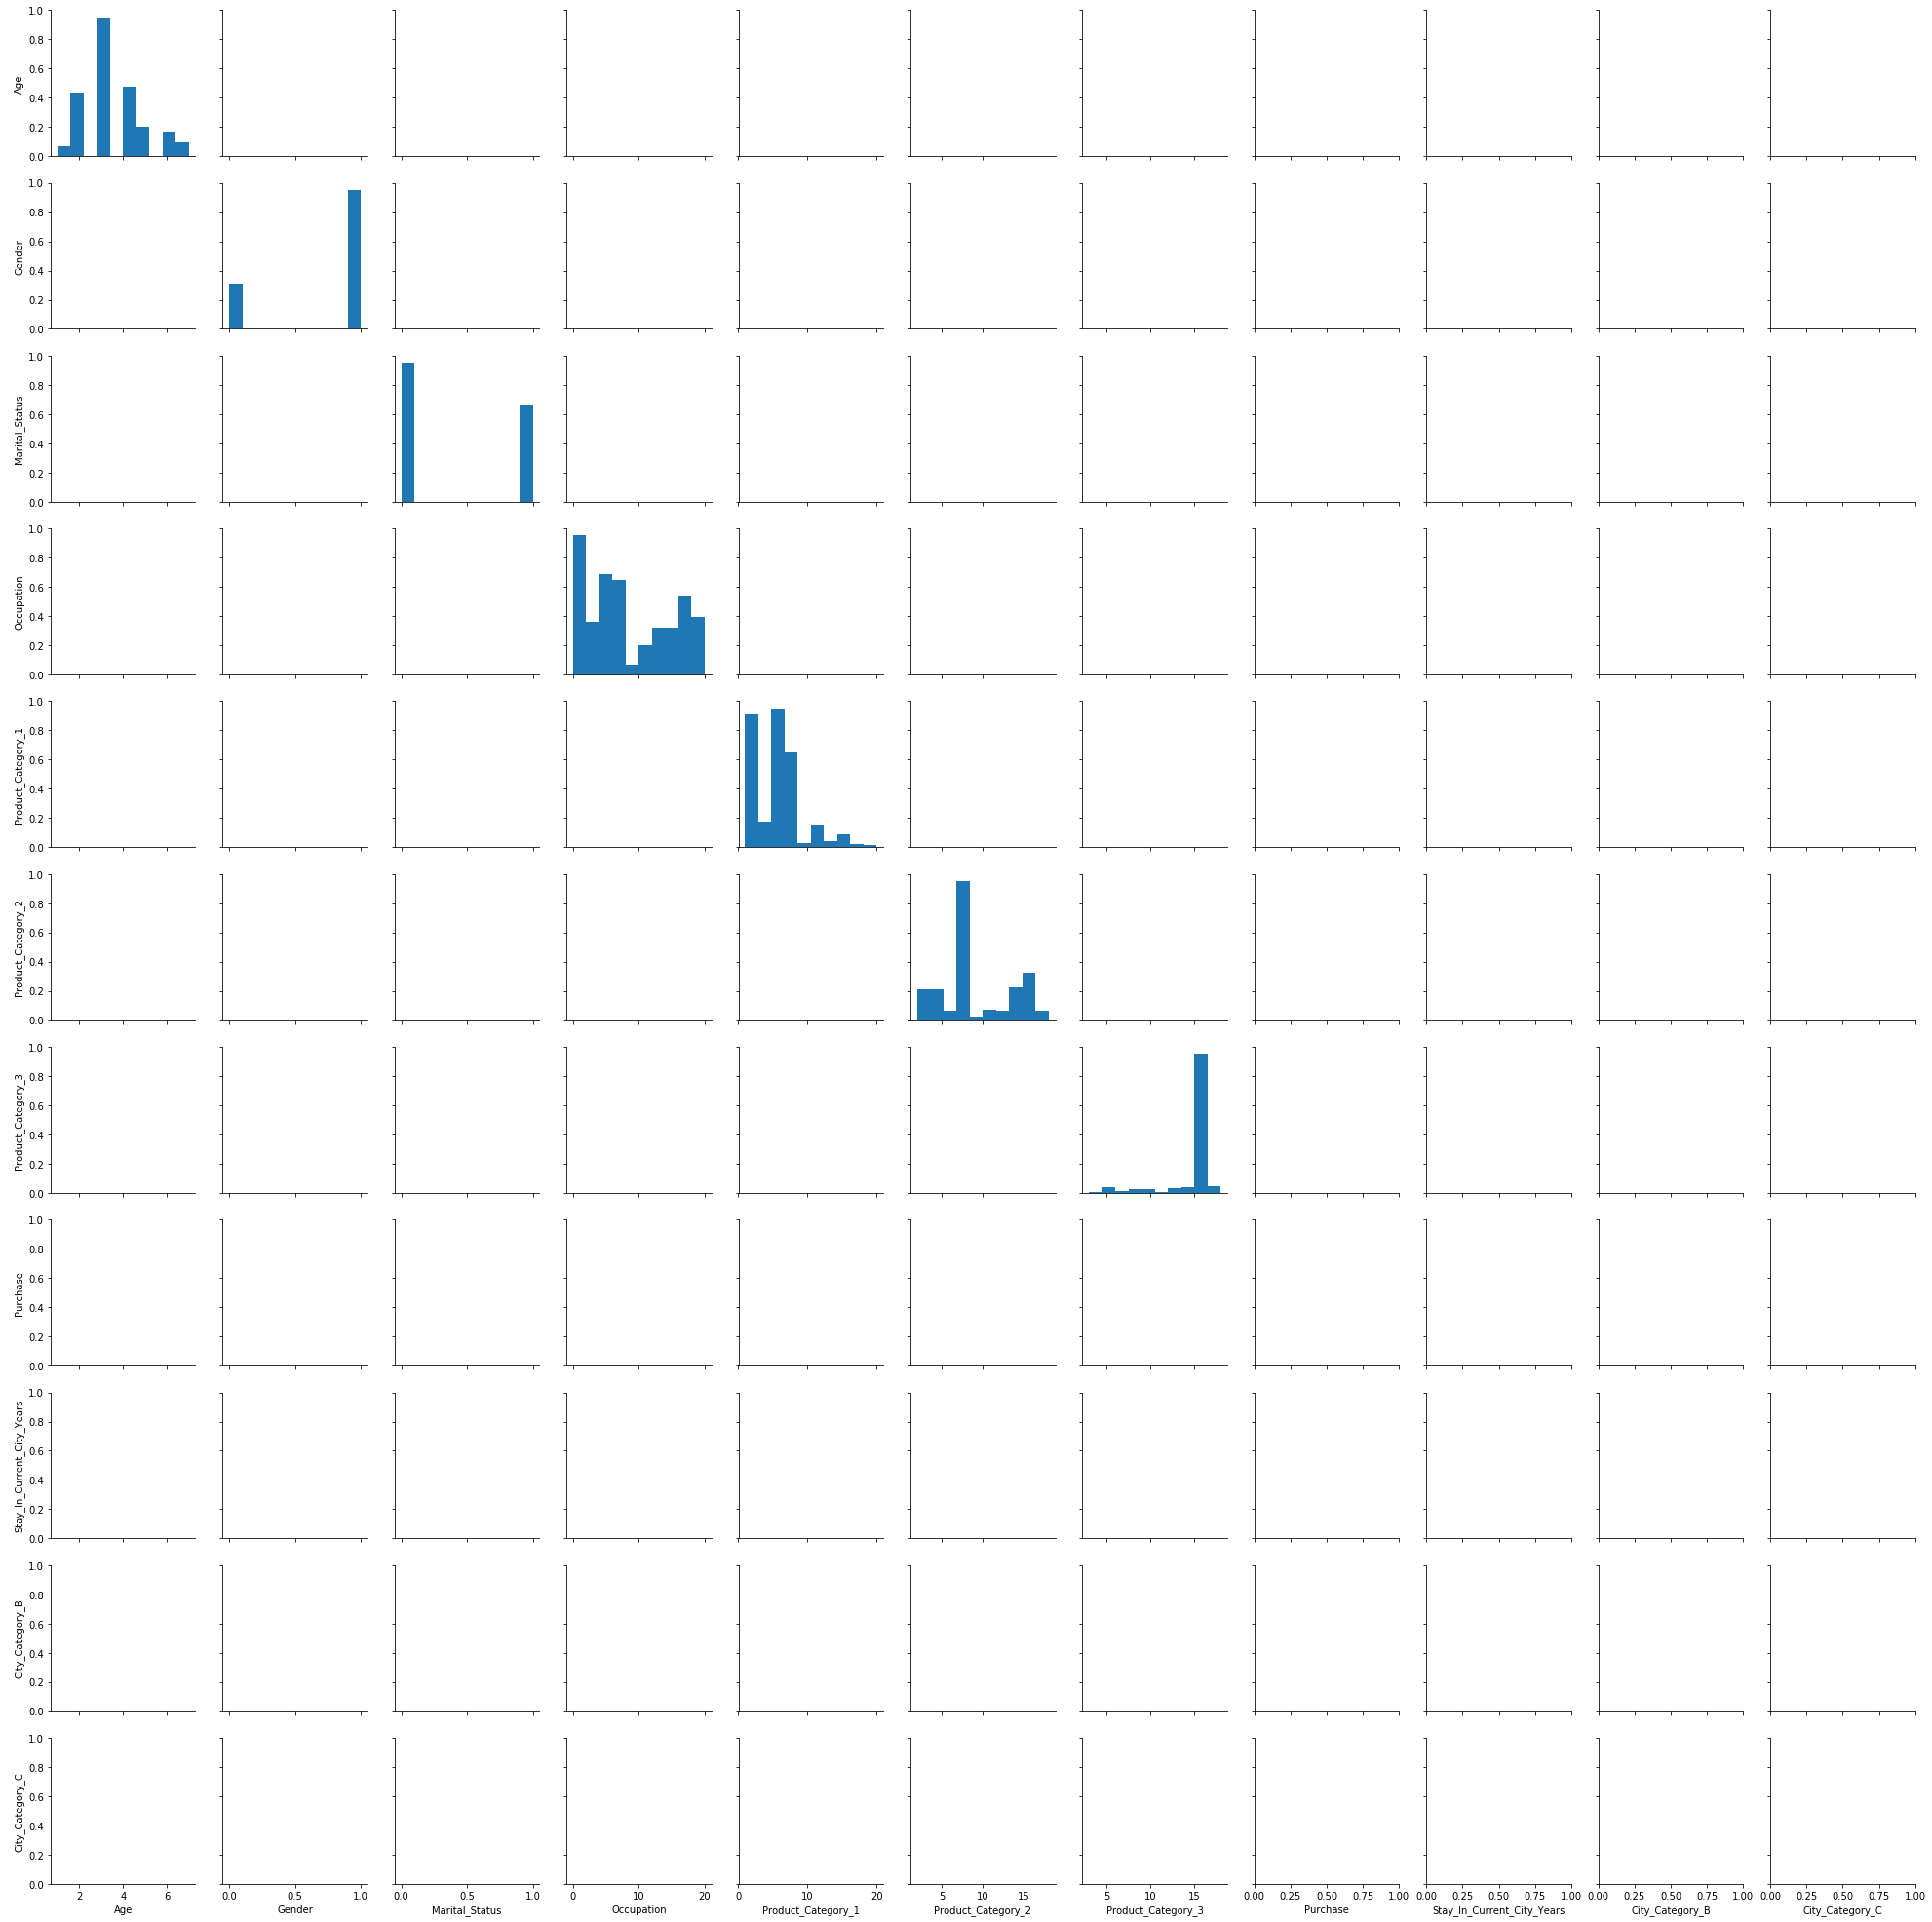

In [148]:
# pairplot
sns.pairplot(df)

/home/pierre/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


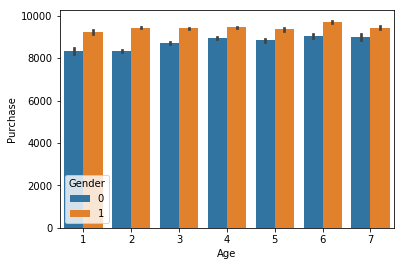

In [151]:
# Age vs purchase
sns.barplot('Age', 'Purchase', hue='Gender', data=df)

/home/pierre/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


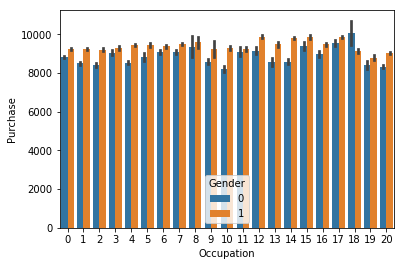

In [152]:
# Occupation vs purchase
sns.barplot('Occupation', 'Purchase', hue='Gender', data=df)

/home/pierre/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


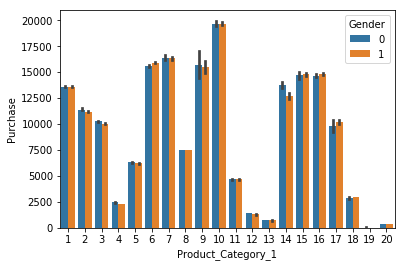

In [155]:
# Product_Category_1 vs purchase
sns.barplot('Product_Category_1', 'Purchase', hue='Gender', data=df)

/home/pierre/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


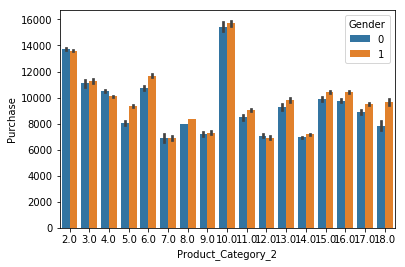

In [156]:
# Product_Category_2 vs purchase
sns.barplot('Product_Category_2', 'Purchase', hue='Gender', data=df)

/home/pierre/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


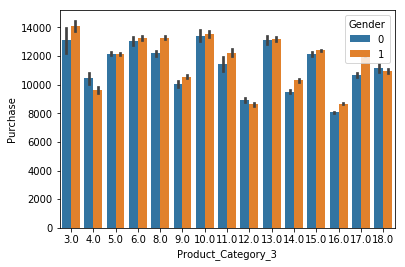

In [157]:
# Product_Category_3 vs purchase
sns.barplot('Product_Category_3', 'Purchase', hue='Gender', data=df)

In [161]:
df.head()

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,City_Category_B,City_Category_C
0,1,0,0,10,3,8.0,16.0,P00069042,8370.0,2,0,0
1,1,0,0,10,1,6.0,14.0,P00248942,15200.0,2,0,0
2,1,0,0,10,12,8.0,16.0,P00087842,1422.0,2,0,0
3,1,0,0,10,12,14.0,16.0,P00085442,1057.0,2,0,0
4,7,1,0,16,8,8.0,16.0,P00285442,7969.0,4,0,1


In [162]:
# drop Product_ID
df.drop(['Product_ID'], axis=1, inplace=True)

In [164]:
df.columns

Index(['Age', 'Gender', 'Marital_Status', 'Occupation', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase',
       'Stay_In_Current_City_Years', 'City_Category_B', 'City_Category_C'],
      dtype='object')

/home/pierre/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


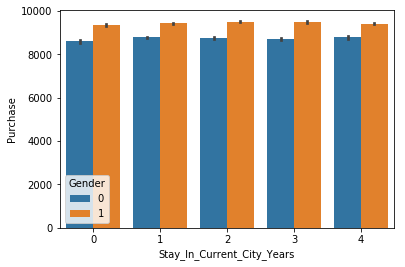

In [165]:
# Stay_In_Current_City_Years vs purchase
sns.barplot('Stay_In_Current_City_Years', 'Purchase', hue='Gender', data=df)

## Feature Scaling

In [166]:
# Get test dataset: where Purchase (dependant feature) is null
df_test = df[df['Purchase'].isnull()]

In [167]:
df_test.shape

(233599, 11)

In [168]:
# Get train dataset: where Purchase (dependant feature) not null
df_train = df[~df['Purchase'].isnull()]

In [169]:
df_train.shape

(550068, 11)

In [170]:
df_train.head()

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years,City_Category_B,City_Category_C
0,1,0,0,10,3,8.0,16.0,8370.0,2,0,0
1,1,0,0,10,1,6.0,14.0,15200.0,2,0,0
2,1,0,0,10,12,8.0,16.0,1422.0,2,0,0
3,1,0,0,10,12,14.0,16.0,1057.0,2,0,0
4,7,1,0,16,8,8.0,16.0,7969.0,4,0,1


In [171]:
df_test.head()

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years,City_Category_B,City_Category_C
0,5,1,1,7,1,11.0,16.0,NaN,2,1,0
1,3,1,0,17,3,5.0,16.0,NaN,0,0,1
2,4,0,1,1,5,14.0,16.0,NaN,4,1,0
3,4,0,1,1,4,9.0,16.0,NaN,4,1,0
4,3,0,0,1,4,5.0,12.0,NaN,1,0,1


In [183]:
# train test split
X = df_train.drop(['Purchase'], axis=1)


In [184]:
X.head()

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Stay_In_Current_City_Years,City_Category_B,City_Category_C
0,1,0,0,10,3,8.0,16.0,2,0,0
1,1,0,0,10,1,6.0,14.0,2,0,0
2,1,0,0,10,12,8.0,16.0,2,0,0
3,1,0,0,10,12,14.0,16.0,2,0,0
4,7,1,0,16,8,8.0,16.0,4,0,1


In [185]:
y = df_train['Purchase']

In [186]:
y.head()

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

In [187]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [189]:
## feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) # fit_transform on training data
X_test = sc.transform(X_test) # transform on testing data

## training the model